In [1]:
# Dataset : http://cb.lk/covid_19

!wget http://cb.lk/covid_19


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [7]:
TRAIN_PATH="CovidDataset/Train"
VAL_PATH="CovidDataset/Val"

In [8]:
import numpy as np
import matplotlib.pyplot as plt
!pip install keras
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [9]:
# CNN Based Model in Keras

model= Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) # To check overfitting

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) 

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) 

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid')) # Output layer we need single neuron i.e and since binary classification so we use sigmoid function

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam', metrics=['accuracy'])
# adam optimizer for gradient descent and accurary metrics as classification matrix


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [11]:
# Train from scratch

train_datagen= image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_dataset=image.ImageDataGenerator(
    rescale=1./255,
)


In [12]:
train_generator= train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size=(224,224), # same as input size in mode, to reshape it
    batch_size=32,
    class_mode='binary', # Since Binary classification, if multiple classes then set to categorical

)

Found 224 images belonging to 2 classes.


In [13]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [14]:
validation_generator=test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size=(224,224), # same as input size in mode, to reshape it
    batch_size=32,
    class_mode='binary', # Since Binary classification, if multiple classes then set to categorical

)

Found 60 images belonging to 2 classes.


In [15]:
hist=model.fit_generator(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=2
)

<ipython-input-15-7161c437622a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist=model.fit_generator(


Epoch 1/10
6/7 [========================>.....] - ETA: 8s - loss: 1.1334 - accuracy: 0.5521 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [ ]:
# Class Activation Maps
# Grad-CAM

In [19]:
model.save('model_CNN')

INFO:tensorflow:Assets written to: model_CNN/assets


In [20]:
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.04896587133407593, 0.9776785969734192]

In [21]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.06169375032186508, 0.949999988079071]

 Test Images

In [16]:
model = load_model('model_CNN.h5')

In [17]:
import os

In [18]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [19]:
y_actual=[]
y_test=[]

In [20]:
for i in os.listdir("./CovidDataset/Val/Normal/"):

  img=image.load_img("./CovidDataset/Val/Normal/"+i, target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=(model.predict(img)> 0.5).astype("int32") # Since sigmoid function
  y_test.append(p[0,0])
  y_actual.append(1)


In [21]:
for i in os.listdir("./CovidDataset/Val/Covid/"):

  img=image.load_img("./CovidDataset/Val/Covid/"+i, target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=(model.predict(img)> 0.5).astype("int32") # Since sigmoid function
  y_test.append(p[0,0])
  y_actual.append(0)

In [22]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
cm=confusion_matrix(y_actual,y_test)

In [25]:
import seaborn as sns

<AxesSubplot:>

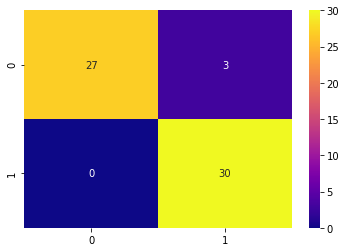

In [26]:
sns.heatmap(cm,cmap="plasma",annot=True)